In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import json
import datetime
import pytz
import gc
from textblob import TextBlob
from datetime import date

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
import nltk
import re
from scipy.signal import find_peaks

from summarizers import Summarizers


/Users/diplavsrivastava/opt/anaconda3/envs/ECE219_1/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
summarize = Summarizers('normal')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BartTokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [4]:
tweet_path = '../ECE219_tweet_data/'
pst_tz = pytz.timezone('America/Los_Angeles')

### Q9.1) Report the following statistics for each hashtag

In [5]:
def get_avg_tweet_per_hour(data):
    df = pd.DataFrame(data,columns=['timestamp'])
    group = df.groupby(pd.Grouper(key = 'timestamp',freq = '60min'))
    avg_tweet = len(data) / len(group)
    return avg_tweet

def get_avg_follower_per_tweet(data):
    return np.mean(data)

def get_avg_retweet_per_tweet(data):
    return np.mean(data)

def get_statistics(file):
    time = []
    num_retweet = []
    num_follower = []
    for line in open(file):
        json_object = json.loads(line)
        time.append(datetime.datetime.fromtimestamp(json_object['citation_date']))
        num_retweet.append(json_object['metrics']['citations']['total'])
        num_follower.append(json_object['author']['followers'])
    avg_tweets = get_avg_tweet_per_hour(time)
    avg_follower = get_avg_follower_per_tweet(num_follower)
    avg_retweet = get_avg_retweet_per_tweet(num_retweet)
    return avg_tweets, avg_follower, avg_retweet

In [6]:
filename = os.path.join(tweet_path, 'tweets_#gohawks.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #goHwaks: ", avg_tweets)
print("Average number of followers of users posting tweet #goHwaks: ", avg_follower)
print("Average number of retweets per tweet #goHwaks: ", avg_retweet)

Average number of tweets per hour #goHwaks:  292.09326424870466
Average number of followers of users posting tweet #goHwaks:  2217.9237355281984
Average number of retweets per tweet #goHwaks:  2.0132093991319877


In [7]:
filename = os.path.join(tweet_path, 'tweets_#gopatriots.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #gopatriots: ", avg_tweets)
print("Average number of followers of users posting tweet #gopatriots: ", avg_follower)
print("Average number of retweets per tweet #gopatriots: ", avg_retweet)

Average number of tweets per hour #gopatriots:  40.888695652173915
Average number of followers of users posting tweet #gopatriots:  1427.2526051635405
Average number of retweets per tweet #gopatriots:  1.4081919101697078


In [8]:
filename = os.path.join(tweet_path, 'tweets_#nfl.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #nfl: ", avg_tweets)
print("Average number of followers of users posting tweet #nfl: ", avg_follower)
print("Average number of retweets per tweet #nfl: ", avg_retweet)

Average number of tweets per hour #nfl:  396.97103918228277
Average number of followers of users posting tweet #nfl:  4662.37544523693
Average number of retweets per tweet #nfl:  1.5344602655543254


In [9]:

filename = os.path.join(tweet_path, 'tweets_#patriots.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #patriots: ", avg_tweets)
print("Average number of followers of users posting tweet #patriots: ", avg_follower)
print("Average number of retweets per tweet #patriots: ", avg_retweet)

Average number of tweets per hour #patriots:  750.6320272572402
Average number of followers of users posting tweet #patriots:  3280.4635616550277
Average number of retweets per tweet #patriots:  1.7852871288476946


In [10]:
filename = os.path.join(tweet_path, 'tweets_#sb49.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #sb49: ", avg_tweets)
print("Average number of followers of users posting tweet #sb49: ", avg_follower)
print("Average number of retweets per tweet #sb49: ", avg_retweet)

Average number of tweets per hour #sb49:  1275.5557461406518
Average number of followers of users posting tweet #sb49:  10374.160292019487
Average number of retweets per tweet #sb49:  2.52713444111402


In [11]:
filename = os.path.join(tweet_path, 'tweets_#superbowl.txt')

avg_tweets, avg_follower, avg_retweet = get_statistics(filename)

print("Average number of tweets per hour #superbowl: ", avg_tweets)
print("Average number of followers of users posting tweet #superbowl: ", avg_follower)
print("Average number of retweets per tweet #superbowls: ", avg_retweet)

Average number of tweets per hour #superbowl:  2067.824531516184
Average number of followers of users posting tweet #superbowl:  8814.96799424623
Average number of retweets per tweet #superbowls:  2.3911895819207736


### Question 9.2) Plot “number of tweets in hour” 

In [12]:
def get_number_tweets_in_hours(filename):
    citation_dates = []
    for line in open(filename):
        json_object = json.loads(line)
        citation_dates.append(json_object['citation_date'])
    dates_frame = pd.DataFrame(sorted(citation_dates), columns = ['date'])
    dates_frame['date'] = dates_frame['date'].apply(lambda x: datetime.datetime.fromtimestamp(x))
    dates_frame['day'] = dates_frame['date'].apply(lambda x: str(x).split(' ')[0].split('-')[2]).astype('int')
    dates_frame['hour'] = dates_frame['date'].apply(lambda x: str(x).split(' ')[1].split(':')[0]).astype('int')
    
    days = dates_frame['day'].to_numpy()
    hour = dates_frame['hour'].to_numpy()
    tweets_cnt = []
    k = 0
    while True:
        if k >= len(days):
            break

        j = k

        cnt = 0
        curr_hour = hour[j]
        curr_day = days[j]
        while j < len(days) and curr_hour == hour[j] and curr_day == days[j]:
            cnt+= 1
            j+= 1

        k = j

        tweets_cnt.append(cnt)

        if k >= len(days):
            break
    return tweets_cnt



In [13]:
filename = os.path.join(tweet_path, 'tweets_#superbowl.txt')
tweets_cnt_superbowl = get_number_tweets_in_hours(filename)

Text(0, 0.5, 'Tweets per hour')

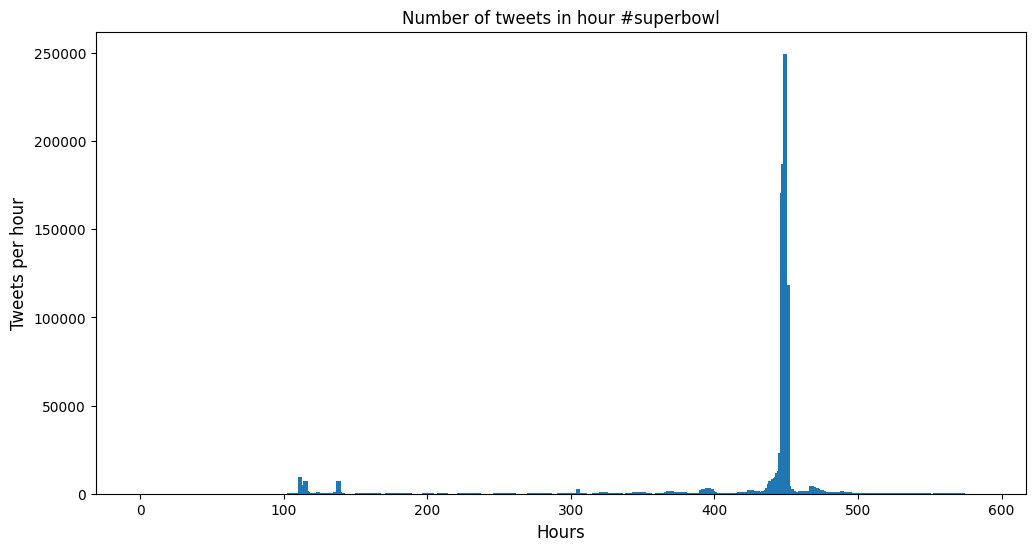

In [14]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(6)

plt.bar(np.arange(len(tweets_cnt_superbowl)), tweets_cnt_superbowl, width=3)
plt.title("Number of tweets in hour #superbowl", size = 12)
plt.xlabel("Hours", size = 12)
plt.ylabel("Tweets per hour", size = 12)

In [15]:
filename = os.path.join(tweet_path, 'tweets_#nfl.txt')
tweets_cnt_nfl = get_number_tweets_in_hours(filename)

Text(0, 0.5, 'Tweets per hour')

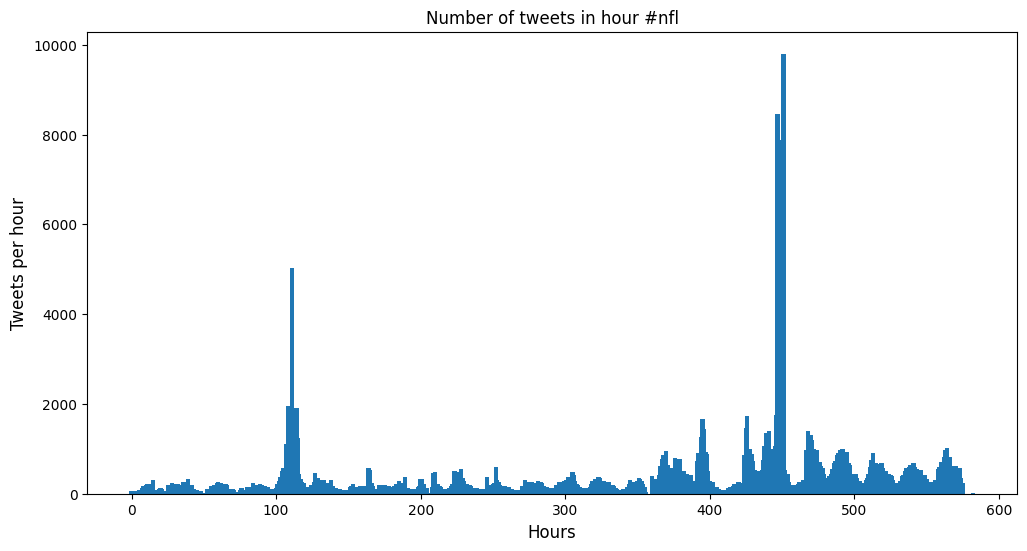

In [16]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(6)

plt.bar(np.arange(len(tweets_cnt_nfl)), tweets_cnt_nfl, width=3)
plt.title("Number of tweets in hour #nfl", size = 12)
plt.xlabel("Hours", size = 12)
plt.ylabel("Tweets per hour", size = 12)

## Question 10) Define your own task

### Fan Base analysis Before, During and After the Match

In [20]:
patriots_roster = ['Akeem Ayers','Alan Branch','Brandon Bolden','Brandon Browner','Brandon LaFell',
 'Brian Tyms','Bryan Stork','Cameron Fleming','Chandler Jones','Chris Jones', 'Chris White','Dan Connolly',
 'Danny Aiken','Danny Amendola','Darius Fleming','Darrelle Revis','Devin McCourty','Donta Hightower',
 'Duron Harmon','James Develin','James White','Jamie Collins','Jimmy Garoppolo','Joe Vellano',
 'Jonas Gray','Jonathan Casillas','Jordan Devey','Josh Boyce','Josh Fline','Julian Edelman','Kyle Arrington',
 'LeGarrette Blount','Logan Ryan','Malcolm Butler','Marcus Cannon','Matthew Slater','Michael Hoomanawanui',
 'Nate Ebner','Nate Solder','Patrick Chung','Rob Gronkowski','Rob Ninkovich','Ryan Allen','Ryan Wendell',
 'Sealver Siliga','Sebastian Vollmer','Shane Vereen','Stephen Gostkowski','Tavon Wilson','Tim Wright',
 'Tom Brady','Vince Wilfork','Zach Moore']

In [25]:
hawks_roster = ['Alvin Bailey','BJ Daniels','Bobby Wagner','Brock Coyle','Bruce Irvin','Bryan Walters',
'Byron Maxwell','Chris Matthews','Christine Michael','Cliff Avril','Clint Gresham','Cooper Helfet',
 'David King','DeShawn Shead','Demarcus Dobbs','Doug Baldwin','Earl Thomas','JR Sweezy','James Carpenter',
 'Jeremy Lane','Jermaine Kearse','Jeron Johnson','Jon Ryan','Justin Britt','KJ Wright','Kam Chancellor',
 'Keavon Milton','Kevin Norwood','Kevin Williams','Landon Cohen','Lemuel Jeanpierre','Luke Wilson',
 'Malcolm Smith','Marcus Burley','Marshawn Lynch','Max Unger','Michael Bennett','Mike Morgan',
 'OBrien Schofield','Patrick Lewis','Ricardo Lockette','Richard Sherman','Robert Turbin','Russell Okung',
 'Russell Wilson','Steven Hauschka','Steven Terrell','Tarvaris Jackson','Tharold Simon','Tony McDaniel',
 'Tony Moeaki','Will Tukuafu']

In [27]:
def preprocess_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity
    if polarity > 0:
        return 1 , polarity, subjectivity
    elif polarity == 0:
        return 0, polarity, subjectivity
    else:
        return -1, polarity, subjectivity
    
    
def get_sentiment_vader(tweet):
    sentiment_analy = sid_obj.polarity_scores(tweet)
    if sentiment['compound'] >= 0.05 :
        return 1
    elif sentiment['compound'] <= - 0.05 :
        return -1
    else :
        return 0


In [37]:
sentiment_analy = SentimentIntensityAnalyzer()

def create_data(filename):
    tmp = []
    tweets = []
    regx = r'(?<![@\w])@(\w{1,25})'
    link_reg1 = r"http\S+"
    link_reg2 = r"www.\S+"

    tweet_columns = ['citation_date', 'user', 'tweet', 'sentiment', 'retweeted', 'followers_count',
               'friends_count', 'location', 'possibly_sensitive',
              'lang', 'filter_level', 'retweets', 'ranking_score', 'impressions', 'geo', 'lat', 'long', 
               'mentions', 'source', 'hasLink']

    file = open(os.path.join(tweet_path, filename))
    for line in file:
        json_object = json.loads(line)

        tmp = np.append(tmp, json_object['citation_date'])
        tmp = np.append(tmp, json_object['tweet']['user']['id'])

        raw_data = json_object['tweet']['text']
        cleaned_tweet = preprocess_tweet(raw_data)
    
        tmp = np.append(tmp, cleaned_tweet)
        
        level, polarity, subjectivity = get_sentiment(cleaned_tweet)
        

        tmp = np.append(tmp, level)
        
        tmp = np.append(tmp, json_object['tweet']['retweeted'])
        tmp = np.append(tmp, json_object['tweet']['user']['followers_count'])
        tmp = np.append(tmp, json_object['tweet']['user']['friends_count'])
        
        location = '0'
        if json_object['tweet']['user']['location']:
            location = json_object['tweet']['user']['location']

        tmp = np.append(tmp, location)
        
        
        tmp = np.append(tmp, json_object['tweet']['possibly_sensitive'])
        tmp = np.append(tmp, json_object['tweet']['lang'])
        tmp = np.append(tmp, json_object['tweet']['filter_level'])
        tmp = np.append(tmp, json_object['metrics']['citations']['total'])
        tmp = np.append(tmp, json_object['metrics']['ranking_score'])
        tmp = np.append(tmp, json_object['metrics']['impressions'])
        tmp = np.append(tmp, json_object['tweet']['geo'])

        latitude = None
        longitude = None
        if json_object['tweet']['coordinates']:
            latitude = str(json_object['tweet']['coordinates'][list(json_object['tweet']['coordinates'].keys())[1]][1])
            longitude = str(json_object['tweet']['coordinates'][list(json_object['tweet']['coordinates'].keys())[1]][0])

        tmp = np.append(tmp, latitude)
        tmp = np.append(tmp, longitude)

        menti = re.findall(regx, json_object['tweet']['text'])
        ment = ','.join(menti)

        tmp = np.append(tmp, ment)
        src = re.sub("<[^>]*>", "", json_object['tweet']['source'])
        tmp = np.append(tmp, src)

        link1 = re.findall(link_reg1, json_object['tweet']['text'])
        link2 = re.findall(link_reg2, json_object['tweet']['text'])
        link = 0

        if len(link1) or len(link2):
            link = 1

        tmp = np.append(tmp, link)


        tweets.append(tmp)
        tmp = []
       
    file.close()
    return pd.DataFrame(tweets, columns=tweet_columns)

In [58]:
# files = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 
#         'tweets_#sb49.txt', 'tweets_#superbowl.txt']


gohawks_data = createData('tweets_#gohawks.txt')
print("gohawks data processed")
gopatriots_data = createData('tweets_#gopatriots.txt')
print("gopatriots data processed")
nfl_data = createData('tweets_#nfl.txt')
print("nfl data processed")
patriots_data = createData('tweets_#patriots.txt')
print("patriots data processed")
sb49_data = createData('tweets_#sb49.txt')
print("sb49 data processed")
superbowl_data = createData('tweets_#superbowl.txt')
print("superbowl data processed")


gohawks data processed
gopatriots data processed
nfl data processed
patriots data processed
sb49 data processed
superbowl data processed


In [59]:
print(len(gohawks_data), print(len(gopatriots_data)), len(patriots_data), len(nfl_data), len(sb49_data), len(superbowl_data))

23511
169122 None 440621 233022 743649 1213813


#### Arranging the tweet data according to the time stamp 

In [60]:
gohawks_data['citation_date'] = pd.to_numeric(gohawks_data['citation_date']).astype(np.int64)
gohawks_data = gohawks_data.sort_values(by = ['citation_date'], ignore_index=True)
gohawks_data['citation_date'] = gohawks_data['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))


gopatriots_data['citation_date'] = pd.to_numeric(gopatriots_data['citation_date']).astype(np.int64)
gopatriots_data = gopatriots_data.sort_values(by = ['citation_date'], ignore_index=True)
gopatriots_data['citation_date'] = gopatriots_data['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))


nfl_data['citation_date'] = pd.to_numeric(nfl_data['citation_date']).astype(np.int64)
nfl_data = nfl_data.sort_values(by = ['citation_date'], ignore_index=True)
nfl_data['citation_date'] = nfl_data['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))

patriots_data['citation_date'] = pd.to_numeric(patriots_data['citation_date']).astype(np.int64)
patriots_data = patriots_data.sort_values(by = ['citation_date'], ignore_index=True)
patriots_data['citation_date'] = patriots_data['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))

sb49_data['citation_date'] = pd.to_numeric(sb49_data['citation_date']).astype(np.int64)
sb49_data = sb49_data.sort_values(by = ['citation_date'], ignore_index=True)
sb49_data['citation_date'] = sb49_data['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))

superbowl_data['citation_date'] = pd.to_numeric(superbowl_data['citation_date']).astype(np.int64)
superbowl_data = superbowl_data.sort_values(by = ['citation_date'], ignore_index=True)
superbowl_data['citation_date'] = superbowl_data['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))

In [63]:
def split_data_accd_kickoff_time(tweet_data, kickoff_time, end_time):
    first_tweet = tweet_data.head(1)['citation_date']
    last_tweet = tweet_data.tail(1)['citation_date']
    
    before = int(str(datetime.datetime.fromisoformat(kickoff_time) - first_tweet[0]).split(' ')[0])
    after = int(str(last_tweet[len(tweet_data) - 1] - datetime.datetime.fromisoformat(end_time)).split(' ')[0])
    
    no_twt_in_game = tweet_data[(tweet_data['citation_date'] >= kickoff_time) & (tweet_data['citation_date'] <= end_time)]
    
    no_twt_before_game = tweet_data[(tweet_data['citation_date'] < kickoff_time)]

    no_twt_after_game = tweet_data[(tweet_data['citation_date'] > end_time)]
    
    return no_twt_in_game, no_twt_before_game, no_twt_after_game, before, after


In [64]:
kickoff_time = '2015-02-01 15:00:00-08:00'
end_time = '2015-02-01 20:00:00-08:00'

gohawks_in_game, gohawks_before_game, gohawks_after_game, gohawks_before, gohawks_after = split_data_accd_kickoff_time(gohawks_data, kickoff_time, end_time)
gopatriots_in_game, gopatriots_before_game, gopatriots_after_game, gopatriots_before, gopatriots_after = split_data_accd_kickoff_time(gopatriots_data, kickoff_time, end_time)

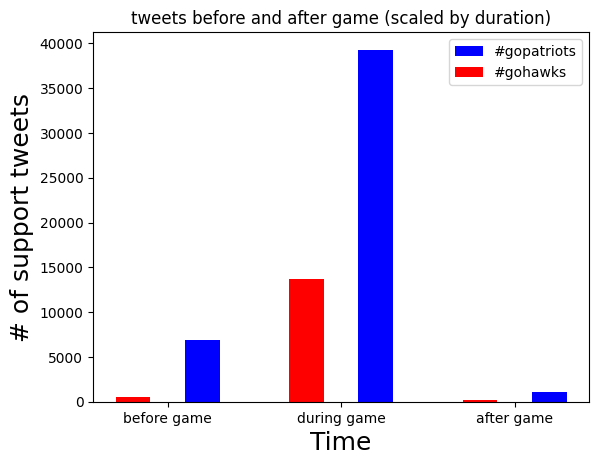

In [65]:

labels = ['before game', 'during game', 'after game']

width = 0.2
x = np.arange(0, 3)
plt.bar(x + 0.2, [len(gohawks_before_game)/ gohawks_before, 
                  len(gohawks_in_game), len(gohawks_after_game)/ gohawks_after], width, color='blue')
plt.bar(x - 0.2, [len(gopatriots_before_game)/ gopatriots_before , 
                  len(gopatriots_in_game), len(gopatriots_after_game)/gopatriots_after], width, color='red')

plt.xticks(x, labels)
plt.xlabel("Time", size = 18)
plt.ylabel("# of support tweets", size = 18)
plt.legend(["#gopatriots", "#gohawks"])
plt.title("tweets before and after game (scaled by duration)")
plt.show()